<a href="https://colab.research.google.com/github/UNT-CSCE-Projects/UNT-CSE-SpaceshipTitanic/blob/dev_latifi/Spaceship_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [688]:
# import packages, libraries
import pandas as pd
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots



from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from google.colab import drive

In [689]:

### Connect with google drive
def connect_and_fetch_train():

  drive.mount('/content/drive')

  ### Train & Test csv dir

  train_file = "1aFLIETCp08ZRwvYj29MPeHokzltUywhv"
  test_file = "1wB9wtBDqedOlLeVfnaMY0b_oTXmu3rg4"


  train_dir = f'https://drive.google.com/uc?id={train_file}'
  return train_dir

def connect_and_fetch_test():
  drive.mount('/content/drive')

  ### Train & Test csv dir

  test_file = "1wB9wtBDqedOlLeVfnaMY0b_oTXmu3rg4"


  test_dir = f'https://drive.google.com/uc?id={test_file}'
  return test_dir



In [690]:
df_train = pd.read_csv(connect_and_fetch_train())
df_test = pd.read_csv(connect_and_fetch_test())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [691]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')


# Data Visualization

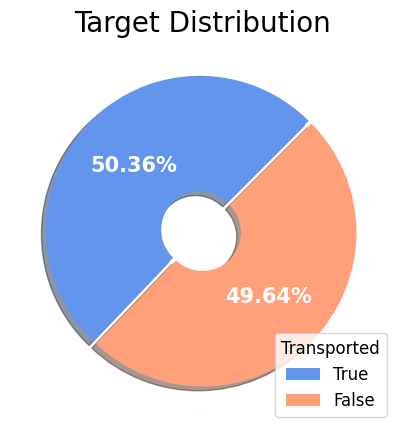

In [692]:
fig, ax = plt.subplots(figsize=(5,5))

labels = df_train["Transported"].value_counts().index
lst = df_train["Transported"].value_counts().to_list()
pie = ax.pie(lst, labels = labels, autopct='%.2f%%', textprops=dict(color="white", fontsize=15, weight="bold"), colors=["cornflowerblue", "lightsalmon"], shadow=True, wedgeprops=dict(width=0.75), startangle=45, explode=(0.025,0))

ax.set_title("Target Distribution", size=20)
ax.legend(title="Transported", title_fontsize=12, loc='best', fontsize=12)
plt.show()

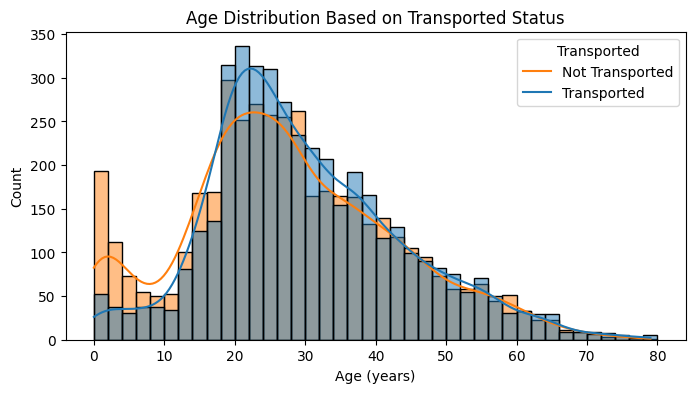

In [693]:
# Figure size
plt.figure(figsize=(8, 4))

# Histogram with custom colors
sns.histplot(data=df_train, x='Age', hue='Transported', binwidth=2, kde=True,)

# Plot title and labels
plt.title('Age Distribution Based on Transported Status')
plt.xlabel('Age (years)')

# Legend labels
legend_labels = ['Not Transported', 'Transported']
plt.legend(title='Transported', labels=legend_labels)

# Show the plot
plt.show()

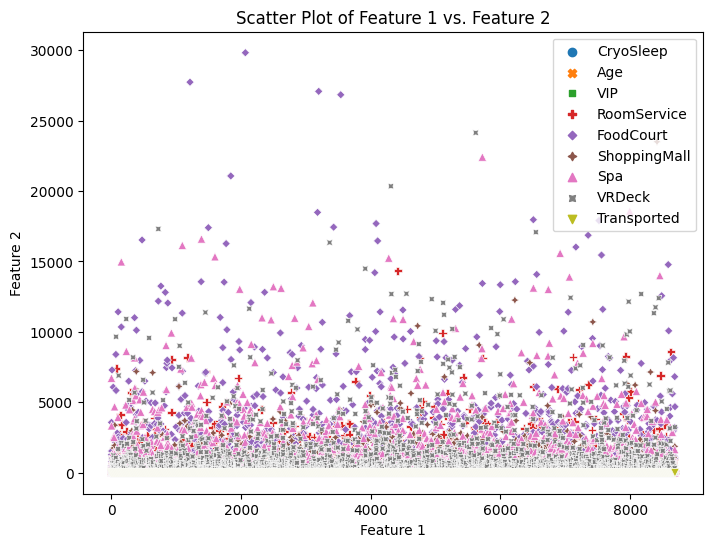

In [694]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_train)
plt.legend(loc="upper right")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Feature 1 vs. Feature 2')
plt.show()

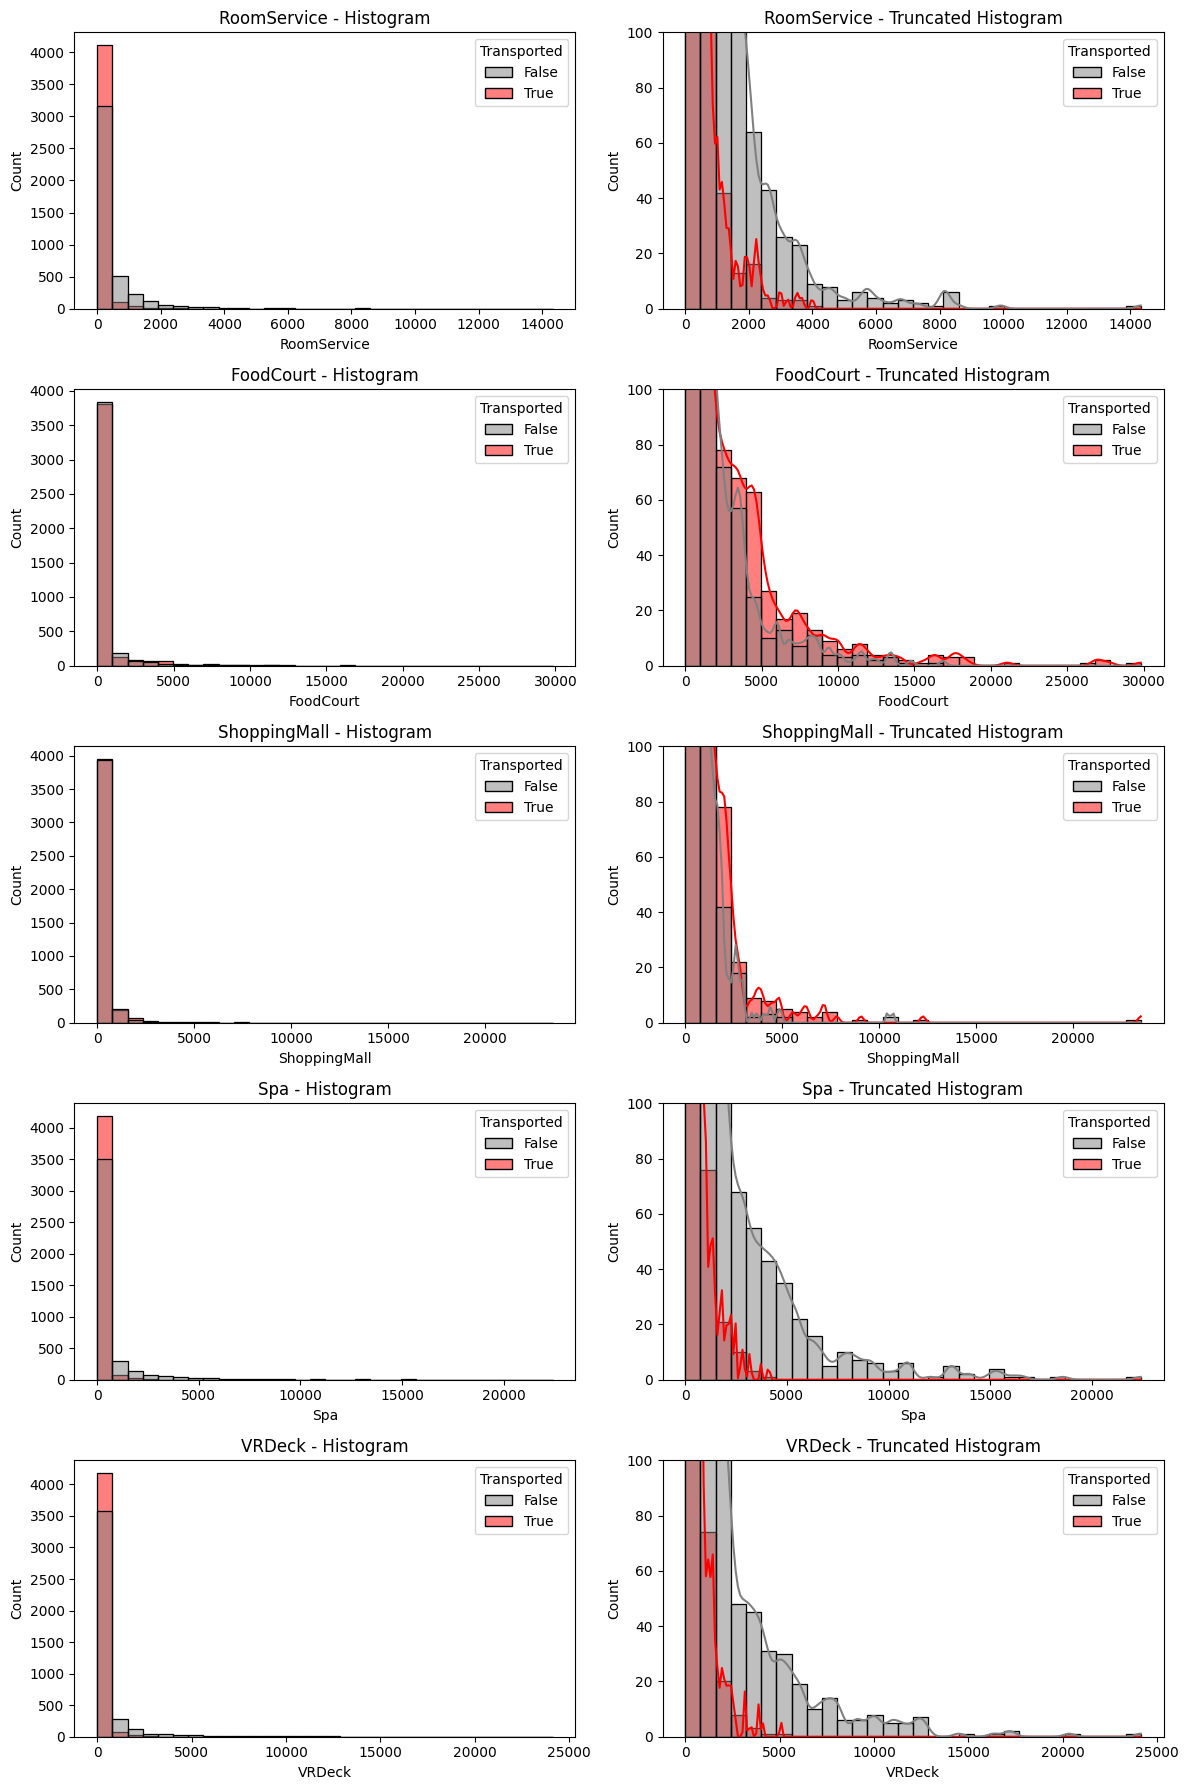

In [695]:
# Expenditure features
exp_feats = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Create a plot
plt.figure(figsize=(12, 18))

# Define custom colors
custom_palette = ['grey', 'red']

for i, var_name in enumerate(exp_feats):
    # Create the left plot
    plt.subplot(5, 2, 2 * i + 1)

    # Plot a histogram with custom colors
    sns.histplot(data=df_train, x=var_name, bins=30, kde=False, hue='Transported', palette=custom_palette)

    # Set title
    plt.title(f'{var_name} - Histogram')

    # Create the right plot (truncated)
    plt.subplot(5, 2, 2 * i + 2)

    # Plot a truncated histogram with KDE and custom colors
    sns.histplot(data=df_train, x=var_name, bins=30, kde=True, hue='Transported', palette=custom_palette)

    # Set y-axis limit
    plt.ylim([0, 100])

    # Set title
    plt.title(f'{var_name} - Truncated Histogram')

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()


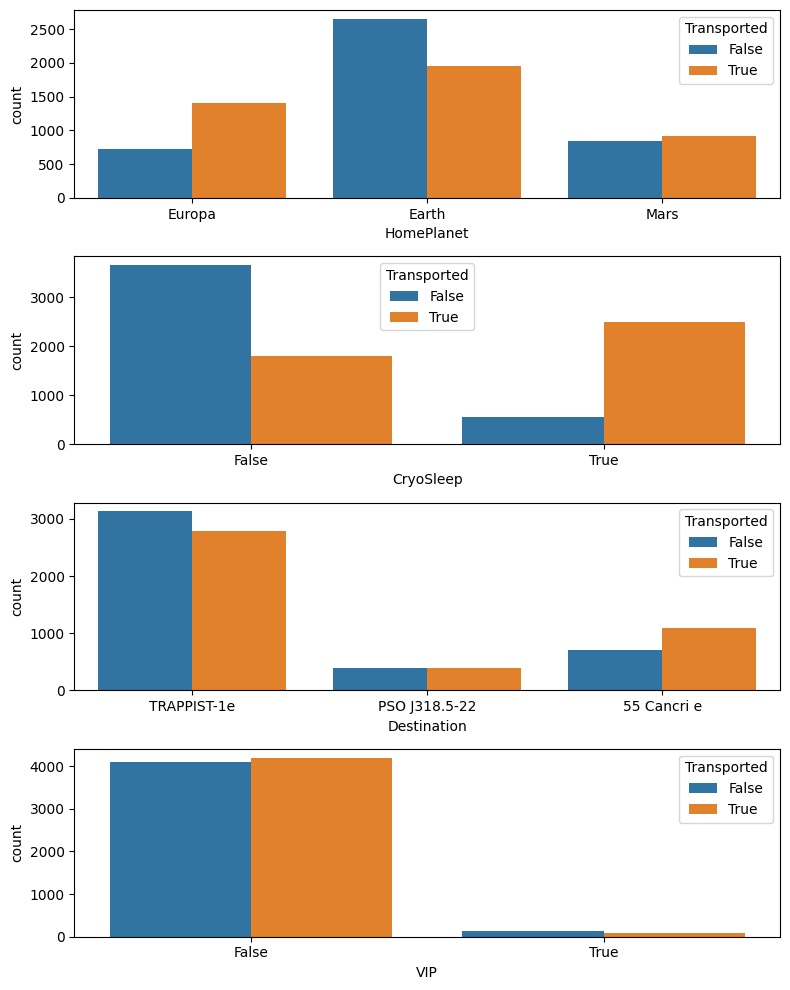

In [696]:
# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig=plt.figure(figsize=(8,10))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=df_train, x=var_name, axes=ax, hue='Transported')

fig.tight_layout()  # Improves appearance a bit
plt.show()

# Preprocessing


In [697]:
df_train['Name'].fillna('Unknown', inplace=True)
df_test['Name'].fillna('Unknown', inplace=True)

df_train['Surname'] = df_train['Name'].str.split(' ').str[1]
df_test['Surname'] = df_test['Name'].str.split(' ').str[1]

In [698]:

df_train['Family'] = df_train['PassengerId'].str.split('_').str[0]

df_test['Family'] = df_test['PassengerId'].str.split('_').str[0]

In [699]:
df_train['Surname'] = df_train.groupby(['Family'])['Surname'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
df_test['Surname'] = df_test.groupby(['Family'])['Surname'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [700]:
df_train[df_train['Cabin'].isna() & ~df_train['Family'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Surname,Family
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False,Pooles,0012
93,0101_01,Mars,True,NaN,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Book Trad,True,Trad,0101
103,0110_01,Europa,False,NaN,TRAPPIST-1e,32.0,False,0.0,410.0,6.0,3929.0,764.0,Graviph Aloubtled,False,Aloubtled,0110
222,0239_01,Mars,False,NaN,TRAPPIST-1e,37.0,False,637.0,0.0,0.0,92.0,319.0,Diedow Resty,False,Resty,0239
227,0244_01,Mars,True,NaN,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Froos Sad,True,Sad,0244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8209,8772_02,Europa,False,NaN,55 Cancri e,53.0,False,0.0,1127.0,0.0,3939.0,NaN,Naosura Motled,False,Motled,8772
8475,9057_01,Europa,False,NaN,55 Cancri e,36.0,True,132.0,3479.0,0.0,3786.0,0.0,Coxan Statch,False,Statch,9057
8485,9069_03,Europa,True,NaN,55 Cancri e,25.0,False,0.0,0.0,0.0,0.0,0.0,Bath Brakeng,True,Brakeng,9069
8509,9081_03,Earth,True,NaN,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Beula Clemondsey,False,Clemondsey,9081


In [701]:
def filling_null_by_feature(df, feature):


  # Filter rows with non-null feature
  non_null = df_train[df_train[feature].notnull()]

  # Create a dictionary mapping 'Family' to non-null 'feature' values
  family_feature_map = dict(zip(non_null['Family'], non_null[feature]))

  # Fill NaN values in feature using the mapped values
  df[feature] = df['Family'].map(family_feature_map)
  return df




In [702]:
# df_train = filling_null_by_feature(df_train, 'Cabin')
# df_test = filling_null_by_feature(df_test, 'Cabin')

In [703]:
# df_train = filling_null_by_feature(df_train, 'HomePlanet')
# df_train = filling_null_by_feature(df_train, 'Destination')



# df_test = filling_null_by_feature(df_test, 'HomePlanet')
# df_test = filling_null_by_feature(df_test, 'Destination')


In [704]:

# test['Family_size']=test['Surname'].map(lambda x: pd.concat([train['Surname'],test['Surname']]).value_counts()[x])

In [705]:
df_train[~df_train['Cabin'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Surname,Family
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Ofracculy,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Vines,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Susent,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Susent,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Santantines,0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,Noxnuther,9276
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,Mondalley,9278
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,Connon,9279
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,Hontichre,9280


In [706]:
def split_cabin(df):
  df[['deck','num','side']]=df['Cabin'].str.split('/',expand=True)

  return df

df_train = split_cabin(df_train)
df_test = split_cabin(df_test)


<Axes: xlabel='deck', ylabel='HomePlanet'>

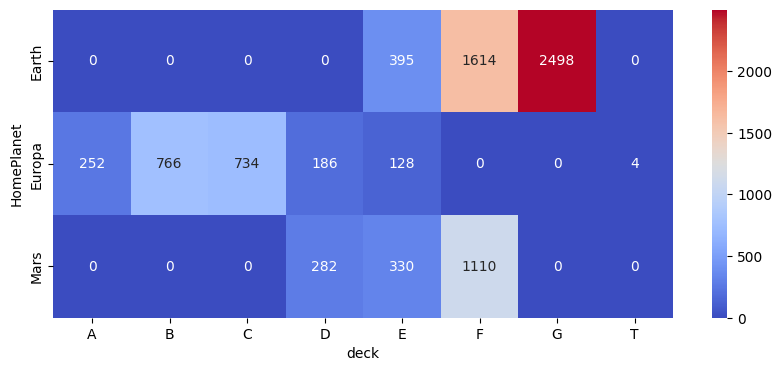

In [707]:
homePlanet_cabin=df_train.groupby(['deck','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(homePlanet_cabin.T, annot=True, fmt='g', cmap='coolwarm')


In [708]:
df_train.loc[df_train['deck'].isin(['A', 'B', 'C','T']), 'HomePlanet'] = 'Europa'
df_train.loc[df_train['deck']=='G', 'HomePlanet'] = 'Earth'
df_test.loc[df_test['deck'].isin(['A', 'B', 'C','T']), 'HomePlanet'] = 'Europa'
df_test.loc[df_test['deck']=='G', 'HomePlanet'] = 'Earth'


In [709]:
df_train[df_train['Destination'].isna()].groupby(['Family', 'Surname'])['Destination'].size().reset_index(name='MissingCount')

,Family,Surname,MissingCount
0,0045,Chmad,1
1,0138,Gambs,1
2,0152,Estron,1
3,0382,Floydendley,1
4,0462,Sosanturney,1
...,...,...,...
175,8956,Bonnondry,1
176,9130,Corte,1
177,9195,Purle,1
178,9197,Platch,1


In [710]:
# Some issues
# def missing_features_related_family(df, features):
#   for feature in features:
#     df[feature] = df.groupby(['Family'])[feature].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
#   return df
# df_train['HomePlanet'] = df_train.groupby(['Family'])['HomePlanet'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# df_test['HomePlanet'] = df_test.groupby(['Family'])['HomePlanet'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
# df_train['Cabin'] = df_train.groupby(['Family'])['Cabin'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# df_test['Cabin'] = df_test.groupby(['Family'])['Cabin'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# df_train['Destination'] = df_train.groupby(['Family'])['Destination'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# df_test['Destination'] = df_test.groupby(['Family'])['Destination'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [711]:
# # Filter rows with non-null 'HomePlanet'
# non_null_homeplanet = df_train[df_train['HomePlanet'].notnull()]

# # Create a dictionary mapping 'Family' to non-null 'HomePlanet' values
# family_homeplanet_map = dict(zip(non_null_homeplanet['Family'], non_null_homeplanet['HomePlanet']))

# # Fill NaN values in 'HomePlanet' using the mapped values
# df_train['HomePlanet'] = df_train['Family'].map(family_homeplanet_map)


# # Filter rows with non-null 'HomePlanet'
# non_null_homeplanet = df_test[df_test['HomePlanet'].notnull()]

# # Create a dictionary mapping 'Family' to non-null 'HomePlanet' values
# family_homeplanet_map = dict(zip(non_null_homeplanet['Family'], non_null_homeplanet['HomePlanet']))

# # Fill NaN values in 'HomePlanet' using the mapped values
# df_test['HomePlanet'] = df_test['Family'].map(family_homeplanet_map)



In [712]:
# # Filter rows with non-null 'HomePlanet'
# non_null_destination = df_train[df_train['Destination'].notnull()]

# # Create a dictionary mapping 'Family' to non-null 'HomePlanet' values
# family_destination_map = dict(zip(non_null_homeplanet['Family'], non_null_destination['Destination']))

# # Fill NaN values in 'HomePlanet' using the mapped values
# df_train['Destination'] = df_train['Family'].map(family_destination_map)


In [713]:
df_train['Cabin']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

In [714]:

# Filter rows with non-null 'Cabin'
non_null_cabin = df_train[df_train['Cabin'].notnull()]

# Create a dictionary mapping 'Family' to non-null 'HomePlanet' values
family_cabin_map = dict(zip(non_null_cabin['Family'], non_null_cabin['Cabin']))

# Fill NaN values in 'HomePlanet' using the mapped values
df_train['Cabin'] = df_train['Family'].map(family_cabin_map)




In [715]:
df_train[df_train['Cabin'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Surname,Family,deck,num,side
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False,Pooles,0012,NaN,NaN,NaN
93,0101_01,Mars,True,NaN,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Book Trad,True,Trad,0101,NaN,NaN,NaN
222,0239_01,Mars,False,NaN,TRAPPIST-1e,37.0,False,637.0,0.0,0.0,92.0,319.0,Diedow Resty,False,Resty,0239,NaN,NaN,NaN
272,0301_01,Earth,True,NaN,TRAPPIST-1e,16.0,False,0.0,0.0,0.0,0.0,0.0,Margia Wriggins,False,Wriggins,0301,NaN,NaN,NaN
280,0310_01,Europa,False,NaN,TRAPPIST-1e,67.0,False,NaN,230.0,0.0,4476.0,241.0,Naviton Coudered,False,Coudered,0310,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7847,8375_01,Earth,False,NaN,PSO J318.5-22,15.0,False,64.0,0.0,0.0,0.0,640.0,Carlen Valezaley,True,Valezaley,8375,NaN,NaN,NaN
7899,8437_01,Earth,False,NaN,PSO J318.5-22,36.0,False,52.0,0.0,132.0,334.0,176.0,Anny Tersony,False,Tersony,8437,NaN,NaN,NaN
8039,8603_01,Earth,True,NaN,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Hilip Klinson,False,Klinson,8603,NaN,NaN,NaN
8066,8623_01,Earth,False,NaN,TRAPPIST-1e,15.0,False,9.0,731.0,85.0,0.0,537.0,Vandy Hoffergess,False,Hoffergess,8623,NaN,NaN,NaN


In [716]:
label_cols = ["HomePlanet", "CryoSleep","deck","side", "Destination" ,"VIP"]
def label_encoder(train,test,columns):
    for col in columns:
        train[col] = train[col].astype(str)
        test[col] = test[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
        test[col] =  LabelEncoder().fit_transform(test[col])
    return train, test

train ,test = label_encoder(df_train,df_test ,label_cols)

In [717]:
df_train["side"].mode()

0    1
Name: side, dtype: int64

# Feature Engineering


In [723]:
def preprocessing_missing_value(df):
  df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)
  df['CryoSleep'].fillna(df['CryoSleep'].mode()[0], inplace=True)
  df['RoomService'].fillna(df['RoomService'].min(), inplace=True)
  df['FoodCourt'].fillna(df['FoodCourt'].mean(), inplace=True)
  df['VIP'].fillna(df['VIP'].mode()[0],inplace = True)
  df['Age'].fillna(df['Age'].mode()[0],inplace = True)
  df['Spa'].fillna(df['Spa'].mean(), inplace = True)
  df['VRDeck'].fillna(df['VRDeck'].median(), inplace = True)
  df['ShoppingMall'].fillna(df['ShoppingMall'].mean(), inplace = True)
  df['HomePlanet'].fillna(df['HomePlanet'].mode()[0],inplace = True)
  df['deck'].fillna(df['deck'].mode()[0],inplace = True)
  df['side'].fillna(df['side'].mode()[0],inplace = True)
  df['num'].fillna(df['num'].median(), inplace = True)
  df['num'] = df['num'].astype('int')
  return df

df_train = preprocessing_missing_value(df_train)
df_test = preprocessing_missing_value(df_test)


In [719]:
df_train.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin            99
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
Surname         104
Family            0
deck              0
num               0
side              0
dtype: int64

In [720]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scr=StandardScaler()
minn=MinMaxScaler()


def scaling(df):
  df["FoodCourt"]= minn.fit_transform(df[["FoodCourt"]])
  df["RoomService"]= minn.fit_transform(df[["RoomService"]])
  df["ShoppingMall"]= minn.fit_transform(df[["ShoppingMall"]])
  df["Spa"]= minn.fit_transform(df[["Spa"]])
  df["Age"]= minn.fit_transform(df[["Age"]])
  df["VRDeck"]= scr.fit_transform(df[["VRDeck"]])
  df["num"]= scr.fit_transform(df[["num"]])

  return df
df_train = scaling(df_train)
df_test = scaling(df_test)
# add new row

df_train


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Surname,Family,deck,num,side
0,0001_01,1,0,B/0/P,2,0.493671,0,0.000000,0.000000,0.000000,0.000000,-0.263003,Maham Ofracculy,False,Ofracculy,0001,1,-1.177238,0
1,0002_01,0,0,F/0/S,2,0.303797,0,0.007608,0.000302,0.001064,0.024500,-0.224205,Juanna Vines,True,Vines,0002,5,-1.177238,1
2,0003_01,1,0,A/0/S,2,0.734177,1,0.003001,0.119948,0.000000,0.299670,-0.219796,Altark Susent,False,Susent,0003,0,-1.177238,1
3,0003_02,1,0,A/0/S,2,0.417722,0,0.000000,0.043035,0.015793,0.148563,-0.092818,Solam Susent,False,Susent,0003,0,-1.177238,1
4,0004_01,0,0,F/1/S,2,0.202532,0,0.021149,0.002348,0.006428,0.025214,-0.261240,Willy Santantines,True,Santantines,0004,5,-1.175264,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,A/98/P,0,0.518987,1,0.000000,0.228726,0.000000,0.073322,-0.197751,Gravior Noxnuther,False,Noxnuther,9276,0,-0.983795,0
8689,9278_01,0,1,G/1499/S,1,0.227848,0,0.000000,0.000000,0.000000,0.000000,-0.263003,Kurta Mondalley,False,Mondalley,9278,6,1.781653,1
8690,9279_01,0,0,G/1500/S,2,0.329114,0,0.000000,0.000000,0.079687,0.000045,-0.263003,Fayey Connon,True,Connon,9279,6,1.783627,1
8691,9280_01,1,0,E/608/S,0,0.405063,0,0.000000,0.035186,0.000000,0.015753,2.589576,Celeon Hontichre,False,Hontichre,9280,4,0.022899,1


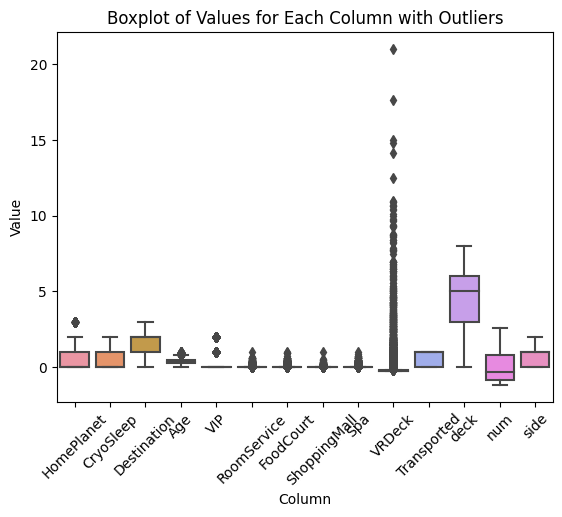

In [721]:

#plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, fliersize=5)  # Set fliersize to highlight outliers
plt.title('Boxplot of Values for Each Column with Outliers')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [724]:

def clipping_quantile(dataframe, quantile_values = None, quantile = 0.99):
    df = dataframe.copy()
    if quantile_values is None:
        quantile_values = df[["VRDeck",'pca_price','pca_pricee']].quantile(quantile)
    for num_column in ["VRDeck",'pca_price','pca_pricee']:
        num_values = df[num_column].values
        threshold = quantile_values[num_column]
        num_values = np.where(num_values > threshold, threshold, num_values)
        df[num_column] = num_values
    return df

df_train = clipping_quantile(df_train, None, 0.99)
df_test = clipping_quantile(df_test, None, 0.99)

KeyError: ignored

In [732]:
def clipping_quantile(dataframe, quantile_values=None, quantile=0.99, columns_to_clip=None):
    df = dataframe.copy()
    if columns_to_clip is None:
        columns_to_clip = ["VRDeck"]

    if quantile_values is None:
        quantile_values = df[columns_to_clip].quantile(quantile)

    for num_column in columns_to_clip:
        if num_column in df.columns:
            num_values = df[num_column].values
            threshold = quantile_values[num_column]
            num_values = np.where(num_values > threshold, threshold, num_values)
            df[num_column] = num_values
        else:
            print(f"Column '{num_column}' not found in DataFrame.")

    return df

# Apply the function with specified columns
df_train = clipping_quantile(df_train, None, 0.99, columns_to_clip=["VRDeck"])
df_test = clipping_quantile(df_test, None, 0.99, columns_to_clip=["VRDeck"])


In [733]:
df_train[df_train['Age']<0]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Surname,Family,deck,num,side


In [734]:
#applying pca , here i want reduce to 4 columns to 2 columns which are roomservice foodcourt shoppingmall and spa.
from sklearn.decomposition import PCA
def reducecolpca(df):
  selected_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa']
  data = df[selected_columns]
  n_components = 2  #number of new columns pca
  pca = PCA(n_components=n_components)
  principal_components = pca.fit_transform(data)
  pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
  df["pca_price"]=pc_df['PC1']
  df["pca_pricee"]=pc_df['PC2']
  return df

df_train = reducecolpca(df_train)
df_test = reducecolpca(df_test)
df_train.drop(['RoomService','FoodCourt','ShoppingMall','Spa'],axis=1,inplace=True)
#df_test.drop(['RoomService','FoodCourt','ShoppingMall','Spa'],axis=1,inplace=True)

In [ ]:
df_train.info()

In [ ]:


# df_train.drop(['RoomService','FoodCourt','ShoppingMall','Spa'],axis=1,inplace=True)

In [ ]:
df_train.head()

In [ ]:
df_test.isnull().sum()

In [ ]:
df_train.isnull().sum()

In [ ]:
df_train.drop(["Name","Cabin"],axis=1,inplace=True)

In [ ]:
df_test.head()

In [ ]:
df_train=df_train.drop(['Cabin'])

# Model Selection



In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split


def split_data(df):
   X = df.drop(columns=['Transported','PassengerId','Cabin','Name'])
   y = df['Transported']
   X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,train_size=0.8,test_size=0.2,random_state=1,shuffle=True)
   return X_train, X_test, y_train, y_test



In [ ]:
X = df_train.drop(columns=['Transported','PassengerId','num'])
X.head()

In [ ]:
def print_confusion_matrix(confusion_matrix):
  f, ax=plt.subplots(figsize=(5,5))
  sns.heatmap(confusion_matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
  plt.xlabel("y_pred")
  plt.ylabel("y_true")
  plt.show()



In [ ]:
from xgboost import XGBClassifier

In [ ]:
def models_on_training(X_train, y_train):
    # Train KNeighborsClassifier Model
    KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
    KNN_Classifier.fit(X_train, y_train)

    # Train LogisticRegression Model
    LGR_Classifier = LogisticRegression(n_jobs=-1)
    LGR_Classifier.fit(X_train, y_train)

    # Train Gaussian Naive Baye Model
    BNB_Classifier = BernoulliNB()
    BNB_Classifier.fit(X_train, y_train)

    # Train Decision Tree Model
    DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=272)
    DTC_Classifier.fit(X_train, y_train)

    # Train RandomForest
    rf_classifier = RandomForestClassifier(max_depth=11, n_estimators=101, random_state=200)
    rf_classifier.fit(X_train, y_train)

    xgbc_model_full = XGBClassifier(gamma = 1.5,
                           subsample = 1.0,
                           max_depth = 5,
                           colsample_bytree = 1.0,
                           n_estimators = 150)
    xgbc_model_full.fit(X_train, y_train)



    models = []
    models.append(('Naive Baye Classifier', BNB_Classifier))
    models.append(('Decision Tree Classifier', DTC_Classifier))
    models.append(('KNeighborsClassifier', KNN_Classifier))
    models.append(('LogisticRegression', LGR_Classifier))
    models.append(('Random Forest', rf_classifier))
    models.append(('xgboost', xgbc_model_full))


    for model_name, model in models:
        scores = cross_val_score(model, X_train, y_train, cv=10)
        accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
        confusion_matrix = metrics.confusion_matrix(y_train, model.predict(X_train))
        classification = metrics.classification_report(y_train, model.predict(X_train))
        print()
        print('============================== {} Model Evaluation =============================='.format(model_name))
        print()
        print("Cross Validation Mean Score:" "\n", scores.mean())
        print()
        print("Model Accuracy:" "\n", accuracy)
        print()
        print_confusion_matrix(confusion_matrix)
        print("Classification report:" "\n", classification)
        print()
    return models


In [ ]:
def model_performance_in_test(models, X_test, y_test):
  for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
    classification = metrics.classification_report(y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print_confusion_matrix(confusion_matrix)
    print()
    print("Classification report:" "\n", classification)
    print()


In [ ]:
def pipeline(df):
  X_train, X_test, y_train, y_test = split_data(df)
  models = models_on_training(X_train, y_train)
  model_performance_in_test(models, X_test, y_test)


In [ ]:
pipeline(df_train)

# Saving the best model in pickle


In [ ]:
# import pickle
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)
# with open('model.pickle', 'wb') as f:
#     pickle.dump(model, f)